# This code is for n=1.5 and rB/rA=0.7

## If you want to compute for another polytropic index and polar radius you can change them at the start by running the code.

# n=0

Set the polar axis:0.7

Grav= 2.0943951023932*r**2 - 6.28318530717959

Velocity= 2.13628300444106

C= -5.25693170700692

Enthalpy= 1.06814150222053*r**2*(1 - n**2) - 2.0943951023932*r**2 + 1.02625360017267

Hmax= 1.02625360017267

new_den(r, n) 
 ρ= 2.91545189504371*(0.51*r**2*(1 - n**2) - r**2 + 0.49)**1.5


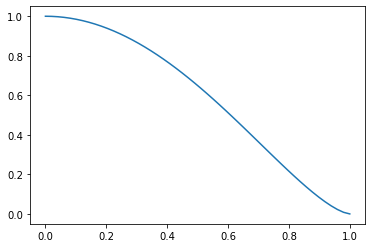

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
#G=1

"""
# Spherical coordinates
r=sy.Symbol('r')
n=sy.Symbol('n') # μ cosine of theta

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
rB = fractions.Fraction(rB)
nB=1

n_index=float(input("Set the polytropic index:"))

# Find gravitational potential 
def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' 
    ρ=1
    f_in=((p**2)/r)*ρ 
    f_out=p*ρ
    integral_in=sy.integrate(sy.integrate(f_in, (m, 0, 1)), (p, 0, r))
    integral_out=sy.integrate(sy.integrate(f_out, (m, 0, 1)), (p, r, 1))

    integral=integral_in + integral_out
    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

grav=lambdify((r, n), gravity(r,n))

"""
Find C and Ωο^2 from boundary conditions
"""
def velocity(r):
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))
den=lambdify((r, n), new_den(r,n))

# Plot density in the equatorial plane
ri=np.linspace(0, 1)
ni=np.linspace(0, 1)
plt.plot(ri, den(ri, 0))
plt.show()

# Use the above desnity as the new density in the next iteration

# n=1

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi
"""
#G=1

"""
# Spherical coordinates
r=sy.Symbol('r')
n=sy.Symbol('n') # μ cosine of theta

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
rB = fractions.Fraction(rB)
nB=1

n_index=float(input("Set the polytropic index:"))

# Find gravitational potential for n=0 and n=1
def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    """
    HERE INPUT THE NEW DENSITY
    
    """
    ρ=fractions.Fraction(1.08831333154568)*p**4+fractions.Fraction(0.353103708488057)*p**3-fractions.Fraction(2.5638115531204)*p**2+fractions.Fraction(0.0960817250700291)*p+(fractions.Fraction(4.375)*m**4-fractions.Fraction(3.75)*m**2+fractions.Fraction(0.375))*(-fractions.Fraction(0.368857337282073)*p**4+fractions.Fraction(0.773374760902981)*p**3-fractions.Fraction(0.495766783713311)*p**2+fractions.Fraction(0.059278401675289)*p+fractions.Fraction(0.0324381100234121))+(fractions.Fraction(14.4375)*m**6-fractions.Fraction(19.6875)*m**4+fractions.Fraction(6.5625)*m**2-fractions.Fraction(0.3125))*(-fractions.Fraction(0.0424703990886132)*p**4+fractions.Fraction(0.208070141580619)*p**3-fractions.Fraction(0.216122003838967)*p**2+fractions.Fraction(0.0167497140114567)*p+fractions.Fraction(0.0337675007415508))+fractions.Fraction(1.0310748255351)
    
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
        
    # n=1
    P2=fractions.Fraction(3/2)*(m**2) - fractions.Fraction(1/2)
    P_2=fractions.Fraction(3/2)*(n**2) - fractions.Fraction(1/2)
    
    f_in_2=(p**4)/(r**3)
    f_out_2=(r**2)/p
    
    func_in=(f_in_0 + f_in_2*P2*P_2)*ρ
    func_out=(f_out_0 + f_out_2*P2*P_2)*ρ

    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))

    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out
    
    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))
grav=lambdify((r, n), gravity(r,n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= 0.325622587351213*r**6 + 0.147907735538852*r**5 - 1.61089030809434*r**4 + 0.100616547208079*r**3 + 2.15947806480163*r**2 - 1.99325336745713

Velocity= 0.707371274884843

C= -1.22420437809412

Enthalpy= -0.325622587351213*r**6 - 0.147907735538852*r**5 + 1.61089030809434*r**4 - 0.100616547208079*r**3 + 0.353685637442421*r**2*(1 - n**2) - 2.15947806480163*r**2 + 0.769048989363018

Hmax= 0.769048989363018

new_den(r, n) 
 ρ= 4.70535274727374*(-0.150787633668844*r**6 - 0.0684923537542109*r**5 + 0.745962802008045*r**4 - 0.0465929933941338*r**3 + 0.163782926628111*r**2*(1 - n**2) - r**2 + 0.356127252181032)**1.5


# n=2

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi
"""
#G=1

"""
# Spherical coordinates
r=sy.Symbol('r')
n=sy.Symbol('n') # μ cosine of theta

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
rB = fractions.Fraction(rB)
nB=1

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    ρ=-fractions.Fraction(3.23055218667022)*p**4+fractions.Fraction(9.21912263828749)*p**3-fractions.Fraction(7.45823337137238)*p**2+fractions.Fraction(0.448081551545615)*p+(fractions.Fraction(14.4375)*m**6-fractions.Fraction(19.6875)*m**4+fractions.Fraction(6.5625)*m**2-fractions.Fraction(0.3125))*(-fractions.Fraction(0.159942931200218)*p**4+fractions.Fraction(0.418744153116639)*p**3-fractions.Fraction(0.314442264606547)*p**2+fractions.Fraction(0.0221553076248089)*p+fractions.Fraction(0.0337257294547165))+(fractions.Fraction(50.2734375)*m**8-fractions.Fraction(93.84375)*m**6+fractions.Fraction(54.140625)*m**4-fractions.Fraction(9.84375)*m**2+fractions.Fraction(0.2734375))*(-fractions.Fraction(0.198289692915936)*p**4+fractions.Fraction(0.501049096311494)*p**3-fractions.Fraction(0.367036289324498)*p**2+fractions.Fraction(0.0280049379532713)*p+fractions.Fraction(0.0366081785784444))+(-fractions.Fraction(0.24466039775597)*p**4+fractions.Fraction(0.618609639102013)*p**3-fractions.Fraction(0.45320906204266)*p**2+fractions.Fraction(0.0342505862248032)*p+fractions.Fraction(0.0453398532430416))*(fractions.Fraction(180.42578125)*m**10-fractions.Fraction(427.32421875)*m**8+fractions.Fraction(351.9140625)*m**6-fractions.Fraction(117.3046875)*m**4+fractions.Fraction(13.53515625)*m**2-fractions.Fraction(0.24609375))+fractions.Fraction(1.02737556776935)
    
    # n=0
    f_in_0=(p**2)/r
    f_out_0=p
        
    # n=1
    P2=fractions.Fraction(3/2)*(m**2) - fractions.Fraction(1/2)
    P_2=fractions.Fraction(3/2)*(n**2) - fractions.Fraction(1/2)
       
    f_in_2=(p**4)/(r**3)
    f_out_2=(r**2)/p
    
    # n=2
    f_in_4=(p**6)/(r**5)
    f_out_4=(r**4)/(p**3)
    
    P4=fractions.Fraction(35/8)*(m**4) - fractions.Fraction(30/8)*(m**2) + fractions.Fraction(3/8)
    P_4=fractions.Fraction(35/8)*(n**4) - fractions.Fraction(30/8)*(n**2) + fractions.Fraction(3/8)
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))

    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))
grav=lambdify((r, n), gravity(r,n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)

print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))


Set the polar axis:0.7

Grav= -0.966578953969677*r**6 + 3.86169706039831*r**5 - 4.68614623365234*r**4 + 0.46922990351494*r**3 + 2.15173035745455*r**2 - 1.30550920276385

Velocity= 0.408927469603586

C= -0.680040803819852

Enthalpy= 0.966578953969677*r**6 - 3.86169706039831*r**5 + 4.68614623365234*r**4 - 0.46922990351494*r**3 + 0.204463734801793*r**2*(1 - n**2) - 2.15173035745455*r**2 + 0.625468398943995

Hmax= 0.625468398943995

new_den(r, n) 
 ρ= 20.5076405524707*(0.206263079676951*r**6 - 0.824066699555071*r**5 + r**4 - 0.1001312976845*r**3 + 0.0436315310293755*r**2*(1 - n**2) - 0.459168419031071*r**2 + 0.133471805564316)**1.5


# n=3

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    ρ=-fractions.Fraction(4.90836462832153)*p**4+fractions.Fraction(12.150604299929)*p**3-fractions.Fraction(8.6210489005859)*p**2+fractions.Fraction(0.349808745671093)*p+(fractions.Fraction(50.2734375)*m**8-fractions.Fraction(93.84375)*m**6+fractions.Fraction(54.140625)*m**4-fractions.Fraction(9.84375)*m**2+fractions.Fraction(0.2734375))*(-fractions.Fraction(0.230821244654108)*p**4+fractions.Fraction(0.547254463114846)*p**3-fractions.Fraction(0.372939411776394)*p**2+fractions.Fraction(0.0198149070929498)*p+fractions.Fraction(0.0367887846042193))+(-fractions.Fraction(0.394393148556805)*p**4+fractions.Fraction(0.937715702555536)*p**3-fractions.Fraction(0.64047002652634)*p**2+fractions.Fraction(0.0337293222573262)*p+fractions.Fraction(0.063577330445073))*(fractions.Fraction(660.1943359375)*m**12-fractions.Fraction(1894.470703125)*m**10+fractions.Fraction(2029.7900390625)*m**8-fractions.Fraction(997.08984375)*m**6+fractions.Fraction(219.9462890625)*m**4-fractions.Fraction(17.595703125)*m**2+fractions.Fraction(0.2255859375))+(-fractions.Fraction(0.28525422735211)*p**4+fractions.Fraction(0.676624108256301)*p**3-fractions.Fraction(0.461152217686141)*p**2+fractions.Fraction(0.0243075400143818)*p+fractions.Fraction(0.0455572518939017))*(fractions.Fraction(180.42578125)*m**10-fractions.Fraction(427.32421875)*m**8+fractions.Fraction(351.9140625)*m**6-fractions.Fraction(117.3046875)*m**4+fractions.Fraction(13.53515625)*m**2-fractions.Fraction(0.24609375))+fractions.Fraction(1.03027555438377)

    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
        
    # n=1
    P2=fractions.Fraction(3/2)*(m**2) - fractions.Fraction(1/2)
    P_2=fractions.Fraction(3/2)*(n**2) - fractions.Fraction(1/2)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=fractions.Fraction(35/8)*(m**4) - fractions.Fraction(30/8)*(m**2) + fractions.Fraction(3/8)
    P_4=fractions.Fraction(35/8)*(n**4) - fractions.Fraction(30/8)*(n**2) + fractions.Fraction(3/8)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=fractions.Fraction(231/16)*(m**6)-fractions.Fraction(315/16)*(m**4)+fractions.Fraction(105/16)*(m**2)-fractions.Fraction(5/16)
    P_6=fractions.Fraction(231/16)*(n**6)-fractions.Fraction(315/16)*(n**4)+fractions.Fraction(105/16)*(n**2)-fractions.Fraction(5/16)
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))
grav=lambdify((r, n), gravity(r,n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.46857926261666*r**6 + 5.0896332273778*r**5 - 5.41676477846381*r**4 + 0.366318861853922*r**3 + 2.1578040752168*r**2 - 1.11260830669726

Velocity= 0.326736410692924

C= -0.547564388675662

Enthalpy= 1.46857926261666*r**6 - 5.0896332273778*r**5 + 5.41676477846381*r**4 - 0.366318861853922*r**3 + 0.163368205346462*r**2*(1 - n**2) - 2.1578040752168*r**2 + 0.565043918021599

Hmax= 0.565043918021599

new_den(r, n) 
 ρ= 29.6815555934373*(0.271117414670745*r**6 - 0.939607576761201*r**5 + r**4 - 0.0676268726510606*r**3 + 0.0301597377822253*r**2*(1 - n**2) - 0.398356613858495*r**2 + 0.104313910817786)**1.5


# n=4

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)
    
    P10=sy.legendre(10, m)
    P12=sy.legendre(12, m)
    P14=sy.legendre(14, m)
    ρ=(-fractions.Fraction(5.43878491755972)*p**4+fractions.Fraction(12.9808831843105)*p**3-fractions.Fraction(8.82872100656969)*p**2+fractions.Fraction(0.253563610399585)*p+fractions.Fraction(1.03213770595852))*P0+(-fractions.Fraction(0.29850779894134)*p**4+fractions.Fraction(0.692039254087069)*p**3-fractions.Fraction(0.457656326705504)*p**2+fractions.Fraction(0.0184349443281619)*p+fractions.Fraction(0.0456645735541863))*P10+(-fractions.Fraction(0.413508620583835)*p**4+fractions.Fraction(0.960342969466459)*p**3-fractions.Fraction(0.63614104831002)*p**2+fractions.Fraction(0.0255819206990338)*p+fractions.Fraction(0.0637270441872071))*P12+(-fractions.Fraction(0.564649355670048)*p**4+fractions.Fraction(1.31490418259536)*p**3-fractions.Fraction(0.873248333933977)*p**2+fractions.Fraction(0.034439850880927)*p+fractions.Fraction(0.088552699354055))*P14
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))
grav=lambdify((r, n), gravity(r,n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.62728064204387*r**6 + 5.43741963319162*r**5 - 5.54724901096665*r**4 + 0.265531191883014*r**3 + 2.16170415635487*r**2 - 1.04454548660611

Velocity= 0.298576806072357

C= -0.503708561223292

Enthalpy= 1.62728064204387*r**6 - 5.43741963319162*r**5 + 5.54724901096665*r**4 - 0.265531191883014*r**3 + 0.149288403036178*r**2*(1 - n**2) - 2.16170415635487*r**2 + 0.540836925382817

Hmax= 0.540836925382817

new_den(r, n) 
 ρ= 32.8486094208437*(0.293349124733144*r**6 - 0.980201109133933*r**5 + r**4 - 0.0478671845013756*r**3 + 0.0269121510033248*r**2*(1 - n**2) - 0.389689403176473*r**2 + 0.0974964210753129)**1.5


# n=5

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    P12=sy.legendre(12, m)
    P14=sy.legendre(14, m)
    P16=sy.legendre(16, m)
    
    ρ=(-fractions.Fraction(5.62243777632987)*p**4+fractions.Fraction(13.2489403527996)*p**3-fractions.Fraction(8.86746425688283)*p**2+fractions.Fraction(0.206185594396855)*p+fractions.Fraction(1.03296269713589))*P0+(-fractions.Fraction(0.420062995654899)*p**4+fractions.Fraction(0.966901013952954)*p**3-fractions.Fraction(0.632583452630582)*p**2+fractions.Fraction(0.02189635687148)*p+fractions.Fraction(0.0637897911554149))*P12+(-fractions.Fraction(0.574321519868151)*p**4+fractions.Fraction(1.32515414365147)*p**3-fractions.Fraction(0.868952710565925)*p**2+fractions.Fraction(0.0293951999308088)*p+fractions.Fraction(0.0886388454148699))*P14+(-fractions.Fraction(0.666430060525535)*p**4+fractions.Fraction(1.54098045707412)*p**3-fractions.Fraction(1.01258257653033)*p**2+fractions.Fraction(0.0334649643657072)*p+fractions.Fraction(0.104470902513886))*P16
    
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10)*ρ
    
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.68222944889368*r**6 + 5.54970315736061*r**5 - 5.57159211307863*r**4 + 0.215917049544401*r**3 + 2.16343201383627*r**2 - 1.01861647620116

Velocity= 0.288005386680208

C= -0.487388510772289

Enthalpy= 1.68222944889368*r**6 - 5.54970315736061*r**5 + 5.57159211307863*r**4 - 0.215917049544401*r**3 + 0.144002693340104*r**2*(1 - n**2) - 2.16343201383627*r**2 + 0.531227965428867

Hmax= 0.531227965428867

new_den(r, n) 
 ρ= 33.9662481494434*(0.301929756297998*r**6 - 0.996071328397023*r**5 + r**4 - 0.0387532046787062*r**3 + 0.0258458785958282*r**2*(1 - n**2) - 0.388296912252044*r**2 + 0.0953458104339465)**1.5


# n=6

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    ρ=(fractions.Fraction(0.0223)*m**30*p**30+m**28*(-fractions.Fraction(0.6025)*p**30-fractions.Fraction(0.033)*p**28)+m**26*(-fractions.Fraction(0.6074)*p**30-fractions.Fraction(0.4067)*p**28-fractions.Fraction(0.0564)*p**26)+m**24*(fractions.Fraction(14.2541)*p**30+fractions.Fraction(2.7206)*p**28+fractions.Fraction(0.2237)*p**26-fractions.Fraction(0.0164)*p**24)+m**22*(-fractions.Fraction(2.9722)*p**30+fractions.Fraction(4.7577)*p**28+fractions.Fraction(2.3675)*p**26+fractions.Fraction(0.5675)*p**24+fractions.Fraction(0.0544)*p**22)+m**20*(-fractions.Fraction(78.5337)*p**30-fractions.Fraction(26.0722)*p**28-fractions.Fraction(5.8636)*p**26-fractions.Fraction(0.4316)*p**24+fractions.Fraction(0.2473)*p**22+fractions.Fraction(0.0844)*p**20)+m**18*(fractions.Fraction(27.8518)*p**30-fractions.Fraction(11.4347)*p**28-fractions.Fraction(12.2913)*p**26-fractions.Fraction(6.2661)*p**24-fractions.Fraction(2.1004)*p**22-fractions.Fraction(0.3969)*p**20+fractions.Fraction(0.0151)*p**18)+m**16*(fractions.Fraction(161.3829)*p**30+fractions.Fraction(71.9453)*p**28+fractions.Fraction(25.5739)*p**26+fractions.Fraction(6.142)*p**24+fractions.Fraction(0.0153)*p**22-fractions.Fraction(0.9548)*p**20-fractions.Fraction(0.6009)*p**18-fractions.Fraction(0.118)*p**16)+m**14*(-fractions.Fraction(34.9446)*p**30+fractions.Fraction(14.2406)*p**28+fractions.Fraction(21.167)*p**26+fractions.Fraction(15.3086)*p**24+fractions.Fraction(8.1675)*p**22+fractions.Fraction(3.4906)*p**20+fractions.Fraction(1.0332)*p**18+fractions.Fraction(0.0237)*p**16-fractions.Fraction(0.2095)*p**14)+m**12*(-fractions.Fraction(146.1317)*p**30-fractions.Fraction(74.6649)*p**28-fractions.Fraction(33.4495)*p**26-fractions.Fraction(11.5457)*p**24-fractions.Fraction(2.5432)*p**22+fractions.Fraction(1.1847)*p**20+fractions.Fraction(1.3657)*p**18+fractions.Fraction(1.3429)*p**16+fractions.Fraction(0.6822)*p**14+fractions.Fraction(0.102)*p**12)+m**10*(-fractions.Fraction(7.358)*p**30-fractions.Fraction(19.2848)*p**28-fractions.Fraction(19.8909)*p**26-fractions.Fraction(13.4992)*p**24-fractions.Fraction(10.5451)*p**22-fractions.Fraction(3.954)*p**20-fractions.Fraction(3.7542)*p**18-fractions.Fraction(0.2616)*p**16-fractions.Fraction(0.8002)*p**14+fractions.Fraction(0.723)*p**12+fractions.Fraction(0.031)*p**10)+m**8*(fractions.Fraction(49.4734)*p**30+fractions.Fraction(27.1752)*p**28+fractions.Fraction(11.0651)*p**26+fractions.Fraction(7.0692)*p**24-fractions.Fraction(2.1927)*p**22+fractions.Fraction(3.4931)*p**20-fractions.Fraction(5.7101)*p**18+fractions.Fraction(3.1148)*p**16-fractions.Fraction(3.8302)*p**14+fractions.Fraction(0.3918)*p**12-fractions.Fraction(0.4147)*p**10+fractions.Fraction(0.1338)*p**8)+m**6*(fractions.Fraction(17.344)*p**30+fractions.Fraction(13.2714)*p**28+fractions.Fraction(6.4033)*p**26+fractions.Fraction(9.269)*p**24-fractions.Fraction(2.2518)*p**22+fractions.Fraction(10.7896)*p**20-fractions.Fraction(9.7303)*p**18+fractions.Fraction(13.3154)*p**16-fractions.Fraction(12.3624)*p**14+fractions.Fraction(10.9791)*p**12-fractions.Fraction(7.5353)*p**10+fractions.Fraction(2.8127)*p**8-fractions.Fraction(0.8399)*p**6)+m**4*(fractions.Fraction(1.2746)*p**30+fractions.Fraction(2.2228)*p**28-fractions.Fraction(0.8544)*p**26+fractions.Fraction(4.7703)*p**24-fractions.Fraction(6.27)*p**22+fractions.Fraction(11.9574)*p**20-fractions.Fraction(15.9471)*p**18+fractions.Fraction(21.5408)*p**16-fractions.Fraction(23.4586)*p**14+fractions.Fraction(23.5131)*p**12-fractions.Fraction(19.1149)*p**10+fractions.Fraction(13.9132)*p**8-fractions.Fraction(7.3872)*p**6+fractions.Fraction(2.2454)*p**4)+m**2*(-fractions.Fraction(0.1398)*p**30+fractions.Fraction(0.4736)*p**28-fractions.Fraction(1.1099)*p**26+fractions.Fraction(2.5297)*p**24-fractions.Fraction(5.0843)*p**22+fractions.Fraction(9.3342)*p**20-fractions.Fraction(15.3339)*p**18+fractions.Fraction(22.5092)*p**16-fractions.Fraction(29.0993)*p**14+fractions.Fraction(32.7148)*p**12-fractions.Fraction(31.1966)*p**10+fractions.Fraction(24.3369)*p**8-fractions.Fraction(14.5295)*p**6+fractions.Fraction(6.327)*p**4-fractions.Fraction(1.5643)*p**2)-fractions.Fraction(0.0316)*p**30+fractions.Fraction(0.1016)*p**28-fractions.Fraction(0.289)*p**26+fractions.Fraction(0.7391)*p**24-fractions.Fraction(1.7107)*p**22+fractions.Fraction(3.6106)*p**20-fractions.Fraction(6.9235)*p**18+fractions.Fraction(11.9639)*p**16-fractions.Fraction(18.4737)*p**14+fractions.Fraction(25.2067)*p**12-fractions.Fraction(29.8895)*p**10+fractions.Fraction(29.9939)*p**8-fractions.Fraction(24.4073)*p**6+fractions.Fraction(14.797)*p**4-fractions.Fraction(5.694)*p**2+fractions.Fraction(0.9999))
    
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    # n=6
    f_in_12=(p**14)/(r**13)
    f_out_12=(r**12)/(p**11)
    
    P12=sy.legendre(12, m)
    P_12=sy.legendre(12, n)
    
    P14=sy.legendre(14, m)
    P16=sy.legendre(16, m)
    P18=sy.legendre(18, m)
    
    ρ=(-fractions.Fraction(5.69107027695621)*p**4+fractions.Fraction(13.3457053580826)*p**3-fractions.Fraction(8.87606657443732)*p**2+fractions.Fraction(0.185961426372327)*p+fractions.Fraction(1.03330178905148))*P0+(-fractions.Fraction(0.577893819040892)*p**4+fractions.Fraction(1.32861501673709)*p**3-fractions.Fraction(0.866804104493152)*p**2+fractions.Fraction(0.0272896127448128)*p+fractions.Fraction(0.08867371834984))*P14+(-fractions.Fraction(0.670895940150471)*p**4+fractions.Fraction(1.54557894185176)*p**3-fractions.Fraction(1.01034975627661)*p**2+fractions.Fraction(0.0310193397599217)*p+fractions.Fraction(0.104511501827954))*P16+(-fractions.Fraction(0.565891487056994)*p**4+fractions.Fraction(1.3041564267241)*p**3-fractions.Fraction(0.852798395802405)*p**2+fractions.Fraction(0.0259016728576979)*p+fractions.Fraction(0.0885145662484659))*P18
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10 + f_in_12*P12*P_12)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10 + f_out_12*P12*P_12)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))

def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.7027642450618*r**6 + 5.59023598799017*r**5 - 5.57699710860524*r**4 + 0.194738350314127*r**3 + 2.16414220628355*r**2 - 1.00846068958936

Velocity= 0.283889634708585

C= -0.481050316022850

Enthalpy= 1.7027642450618*r**6 - 5.59023598799017*r**5 + 5.57699710860524*r**4 - 0.194738350314127*r**3 + 0.141944817354292*r**2*(1 - n**2) - 2.16414220628355*r**2 + 0.527410373566509

Hmax= 0.527410373566509

new_den(r, n) 
 ρ= 34.5081924290579*(0.304596129522966*r**6 - r**5 + 0.997631785238876*r**4 - 0.0348354435720594*r**3 + 0.0253915608677775*r**2*(1 - n**2) - 0.387128953220025*r**2 + 0.0943449211624654)**1.5


# n=7

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    # n=6
    f_in_12=(p**14)/(r**13)
    f_out_12=(r**12)/(p**11)
    
    P12=sy.legendre(12, m)
    P_12=sy.legendre(12, n)
    
    # n=7
    f_in_14=(p**16)/(r**15)
    f_out_14=(r**14)/(p**13)
    
    P14=sy.legendre(14, m)
    P_14=sy.legendre(14, n)
    
    
    P16=sy.legendre(16, m)
    P18=sy.legendre(18, m)
    P20=sy.legendre(20, m)
    P22=sy.legendre(22, m)
    
    ρ=(-fractions.Fraction(5.71772221418255)*p**4+fractions.Fraction(13.3827343110498)*p**3-fractions.Fraction(8.87846031930799)*p**2+fractions.Fraction(0.177700455460692)*p+fractions.Fraction(1.03343834720088))*P0+(-fractions.Fraction(0.672621351820497)*p**4+fractions.Fraction(1.54729260897039)*p**3-fractions.Fraction(1.00937807081577)*p**2+fractions.Fraction(0.0300274237181661)*p+fractions.Fraction(0.104527772888326))*P16+(-fractions.Fraction(0.567383020703906)*p**4+fractions.Fraction(1.30567034504489)*p**3-fractions.Fraction(0.852013192039024)*p**2+fractions.Fraction(0.0250671694179921)*p+fractions.Fraction(0.0885282466937884))*P18
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10 + f_in_12*P12*P_12 + f_in_14*P14*P_14)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10 + f_out_12*P12*P_12 + f_out_14*P14*P_14)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))


def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.71073848603267*r**6 + 5.60574663953842*r**5 - 5.57850114286529*r**4 + 0.186087481804957*r**3 + 2.16442821300284*r**2 - 1.00443928690366

Velocity= 0.282263673519241

C= -0.478548418215036

Enthalpy= 1.71073848603267*r**6 - 5.60574663953842*r**5 + 5.57850114286529*r**4 - 0.186087481804957*r**3 + 0.141131836759621*r**2*(1 - n**2) - 2.16442821300284*r**2 + 0.525890868688626

Hmax= 0.525890868688626

new_den(r, n) 
 ρ= 34.8022043590728*(0.305175848292269*r**6 - r**5 + 0.995139720286152*r**4 - 0.0331958423686946*r**3 + 0.0251762781721511*r**2*(1 - n**2) - 0.386108818714123*r**2 + 0.0938128143322454)**1.5


# n=8

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    # n=6
    f_in_12=(p**14)/(r**13)
    f_out_12=(r**12)/(p**11)
    
    P12=sy.legendre(12, m)
    P_12=sy.legendre(12, n)
    
    # n=7
    f_in_14=(p**16)/(r**15)
    f_out_14=(r**14)/(p**13)
    
    P14=sy.legendre(14, m)
    P_14=sy.legendre(14, n)
    
    # n=8
    f_in_16=(p**18)/(r**17)
    f_out_16=(r**16)/(p**15)
    
    P16=sy.legendre(16, m)
    P_16=sy.legendre(16, n)
    
    P18=sy.legendre(18, m)
    P24=sy.legendre(24, m)
    P22=sy.legendre(22, m)
    
    ρ=(-fractions.Fraction(5.72824165631949)*p**4+fractions.Fraction(13.3972642440166)*p**3-fractions.Fraction(8.87925747216595)*p**2+fractions.Fraction(0.174376236648857)*p+fractions.Fraction(1.03349300446686))*P0+(-fractions.Fraction(0.567970511386774)*p**4+fractions.Fraction(1.30625825313011)*p**3-fractions.Fraction(0.851689371920111)*p**2+fractions.Fraction(0.0247321981966976)*p+fractions.Fraction(0.0885337130529807))*P18+(-fractions.Fraction(0.185480896825269)*p**4+fractions.Fraction(0.417878491028034)*p**3-fractions.Fraction(0.267091682031092)*p**2+fractions.Fraction(0.0101241628963201)*p+fractions.Fraction(0.0245295801578414))*P22
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10 + f_in_12*P12*P_12 + f_in_14*P14*P_14 + f_in_16*P16*P_16)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10 + f_out_12*P12*P_12 + f_out_14*P14*P_14 + f_out_16*P16*P_16)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))


def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))

Set the polar axis:0.7

Grav= -1.71388589576003*r**6 + 5.61183292362717*r**5 - 5.57900200877777*r**4 + 0.182606368005561*r**3 + 2.16454268691302*r**2 - 1.00283976031527

Velocity= 0.281614450017894

C= -0.477552911316263

Enthalpy= 1.71388589576003*r**6 - 5.61183292362717*r**5 + 5.57900200877777*r**4 - 0.182606368005561*r**3 + 0.140807225008947*r**2*(1 - n**2) - 2.16454268691302*r**2 + 0.525286848999007

Hmax= 0.525286848999007

new_den(r, n) 
 ρ= 34.9190409231791*(0.305405723777727*r**6 - r**5 + 0.994149698450362*r**4 - 0.032539523269972*r**3 + 0.0250911292130802*r**2*(1 - n**2) - 0.385710465078134*r**2 + 0.0936034369069368)**1.5


# n=9

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

n_index=float(input("Set the polytropic index:"))

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    # n=6
    f_in_12=(p**14)/(r**13)
    f_out_12=(r**12)/(p**11)
    
    P12=sy.legendre(12, m)
    P_12=sy.legendre(12, n)
    
    # n=7
    f_in_14=(p**16)/(r**15)
    f_out_14=(r**14)/(p**13)
    
    P14=sy.legendre(14, m)
    P_14=sy.legendre(14, n)
    
    # n=8
    f_in_16=(p**18)/(r**17)
    f_out_16=(r**16)/(p**15)
    
    P16=sy.legendre(16, m)
    P_16=sy.legendre(16, n)
    
    # n=9
    f_in_18=(p**20)/(r**19)
    f_out_18=(r**18)/(p**17)
    
    P18=sy.legendre(18, m)
    P_18=sy.legendre(18, n)
    
    P26=sy.legendre(26, m)
    P24=sy.legendre(24, m)
    P22=sy.legendre(22, m)
    
    ρ=(-fractions.Fraction(5.73239062601121)*p**4+fractions.Fraction(13.4029659979054)*p**3-fractions.Fraction(8.8795229028872)*p**2+fractions.Fraction(0.173044660203691)*p+fractions.Fraction(1.03351483948388))*P0+(-fractions.Fraction(0.185499258981001)*p**4+fractions.Fraction(0.41784946143824)*p**3-fractions.Fraction(0.267001950994272)*p**2+fractions.Fraction(0.0100805418575009)*p+fractions.Fraction(0.0245302774174412))*P22+(-fractions.Fraction(0.385916294799921)*p**4+fractions.Fraction(0.887478273853709)*p**3-fractions.Fraction(0.578420121292232)*p**2+fractions.Fraction(0.0164537495451378)*p+fractions.Fraction(0.0602989247529486))*P24+(-fractions.Fraction(0.468430747160992)*p**4+fractions.Fraction(1.07558000213142)*p**3-fractions.Fraction(0.700317623347111)*p**2+fractions.Fraction(0.0200437128848748)*p+fractions.Fraction(0.0729857405597672))*P26
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10 + f_in_12*P12*P_12 + f_in_14*P14*P_14 + f_in_16*P16*P_16 + f_in_18*P18*P_18)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10 + f_out_12*P12*P_12 + f_out_14*P14*P_14 + f_out_16*P16*P_16 + f_out_18*P18*P_18)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))


def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())

def new_den(r, n):
    den=(enthalpy(r,n)/Hmax())**n_index
    return(den)
print("\nnew_den(r, n)", "\n", 'ρ=',  new_den(r, n))


Set the polar axis:0.7

Grav= -1.71512726458893*r**6 + 5.61422126871112*r**5 - 5.57916878381855*r**4 + 0.181211944412953*r**3 + 2.16458841806573*r**2 - 1.00220587290043

Velocity= 0.281113616923469

C= -0.477037098579845

Enthalpy= 1.71512726458893*r**6 - 5.61422126871112*r**5 + 5.57916878381855*r**4 - 0.181211944412953*r**3 + 0.140556808461735*r**2*(1 - n**2) - 2.16458841806573*r**2 + 0.525168774320582

Hmax= 0.525168774320582

new_den(r, n) 
 ρ= 34.9531196854304*(0.30549691266135*r**6 - r**5 + 0.993756483185313*r**4 - 0.0322773071704305*r**3 + 0.0250358512310654*r**2*(1 - n**2) - 0.385554525634623*r**2 + 0.0935425857273252)**1.5


# Final Iteration for n=9

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy.utilities.lambdify import lambdify
import math
import fractions

pi=math.pi

"""
Set the equatorial axis
"""

rA=1
nA=0

rB=float(input("Set the polar axis:"))
nB=1

r=sy.Symbol('r')
n=sy.Symbol('n')

def gravity(r, n):
    p=sy.Symbol('p') # r'
    m=sy.Symbol('m') # μ' cosine of theta
    
    # n=0
    f_in_0=((p**2)/r)
    f_out_0=p
    P0=sy.legendre(0, m)
    
    # n=1
    P2=sy.legendre(2, m)
    P_2=sy.legendre(2, n)
    
    f_in_2=((p**4)/(r**3))
    f_out_2=((r**2)/p)
    
    # n=2
    f_in_4=((p**6)/(r**5))
    f_out_4=((r**4)/(p**3))
    
    P4=sy.legendre(4, m)
    P_4=sy.legendre(4, n)
    
    # n=3
    f_in_6=((p**8)/(r**7))
    f_out_6=((r**6)/(p**5))
    
    P6=sy.legendre(6, m)
    P_6=sy.legendre(6, n)
    
    # n=4
    f_in_8=(p**10)/(r**9)
    f_out_8=(r**8)/(p**7)
    
    P8=sy.legendre(8, m)
    P_8=sy.legendre(8, n)

    # n=5
    f_in_10=(p**12)/(r**11)
    f_out_10=(r**10)/(p**9)
    
    P10=sy.legendre(10, m)
    P_10=sy.legendre(10, n)
    
    # n=6
    f_in_12=(p**14)/(r**13)
    f_out_12=(r**12)/(p**11)
    
    P12=sy.legendre(12, m)
    P_12=sy.legendre(12, n)
    
    # n=7
    f_in_14=(p**16)/(r**15)
    f_out_14=(r**14)/(p**13)
    
    P14=sy.legendre(14, m)
    P_14=sy.legendre(14, n)
    
    # n=8
    f_in_16=(p**18)/(r**17)
    f_out_16=(r**16)/(p**15)
    
    P16=sy.legendre(16, m)
    P_16=sy.legendre(16, n)
    
    # n=9
    f_in_18=(p**20)/(r**19)
    f_out_18=(r**18)/(p**17)
    
    P18=sy.legendre(18, m)
    P_18=sy.legendre(18, n)
    
    # n=10
    f_in_20=(p**22)/(r**21)
    f_out_20=(r**20)/(p**19)
    
    P20=sy.legendre(20, m)
    P_20=sy.legendre(20, n)
    
    P26=sy.legendre(26, m)
    P24=sy.legendre(24, m)
    P22=sy.legendre(22, m)
    
    ρ=(-fractions.Fraction(5.73161806923945)*p**4+fractions.Fraction(13.40062249808)*p**3-fractions.Fraction(8.8773538180977)*p**2+fractions.Fraction(0.17243095250932)*p+fractions.Fraction(1.03352376933486))*P0+(-fractions.Fraction(0.185385682491448)*p**4+fractions.Fraction(0.417625996892232)*p**3-fractions.Fraction(0.266872183503757)*p**2+fractions.Fraction(0.0100608109087946)*p+fractions.Fraction(0.0245304608114473))*P22+(-fractions.Fraction(0.385766333406819)*p**4+fractions.Fraction(0.88715231651048)*p**3-fractions.Fraction(0.578201864664129)*p**2+fractions.Fraction(0.0164109809531309)*p+fractions.Fraction(0.0602994519244211))*P24+(-fractions.Fraction(0.468253008105761)*p**4+fractions.Fraction(1.07519305345232)*p**3-fractions.Fraction(0.700057598911572)*p**2+fractions.Fraction(0.0199923098514706)*p+fractions.Fraction(0.0729863756981591))*P26
    
    func_in= (f_in_0 + f_in_2*P2*P_2 + f_in_4*P4*P_4 + f_in_6*P6*P_6 + f_in_8*P8*P_8 + f_in_10*P10*P_10 + f_in_12*P12*P_12 + f_in_14*P14*P_14 + f_in_16*P16*P_16 + f_in_18*P18*P_18 + f_in_20*P20*P_20)*ρ
    func_out= (f_out_0 + f_out_2*P2*P_2 + f_out_4*P4*P_4 + f_out_6*P6*P_6 + f_out_8*P8*P_8 + f_out_10*P10*P_10 + f_out_12*P12*P_12 + f_out_14*P14*P_14 + f_out_16*P16*P_16 + f_out_18*P18*P_18 + f_out_20*P20*P_20)*ρ
    
    # in
    integral_in=sy.integrate(sy.integrate(func_in, (m, 0, 1)), (p, 0, r))
    
    # out
    integral_out=sy.integrate(sy.integrate(func_out, (m, 0, 1)), (p, r, 1))
    
    integral=integral_in + integral_out

    Fg=-4*pi*integral
    return (Fg)
print("\nGrav=", gravity(r, n))
gravity=lambdify((r, n), gravity(r, n))

def velocity(r):
    #V=sy.Symbol("V")
    V=2*(gravity(rA, nA)-gravity(rB, nB))
    return(V)
print("\nVelocity=", velocity(r))
vel=lambdify(r, velocity(r))


def constant(r):
    c=gravity(rA, nA)-(1/2)*velocity(r)
    return (c)
print("\nC=", constant(r))
con=lambdify(r, constant(r))

# Enthalpy
def enthalpy(r, n):
    H=constant(r)-gravity(r, n)+(1/2)*velocity(r)*(r**2)*(1-n**2)
    return (H)
print("\nEnthalpy=", enthalpy(r, n))
enth=lambdify((r,n), enthalpy(r, n))

def Hmax():
    Hmax=enth(0, 0)
    return(Hmax)
print("\nHmax=", Hmax())


Set the polar axis:0.7

Grav= -1.71489611614335*r**6 + 5.61323962579976*r**5 - 5.57780590765061*r**4 + 0.180569271218257*r**3 + 2.16460712070189*r**2 - 1.00223385052079

Velocity= 0.2813821448821059

C= -0.4772109290358967

Enthalpy= 1.71489611614335*r**6 - 5.61323962579976*r**5 + 5.57780590765061*r**4 - 0.180569271218257*r**3 + 0.140691072441053*r**2*(1 - n**2) - 2.16460712070189*r**2 + 0.525022921484893

Hmax= 0.525022921484893
